In [71]:
from astropy.table import Table
import pylab as pl
import numpy as np
import pandas as pd

In [36]:
data = Table.read('./data/gama_gold_ddp.fits')

In [37]:
# data.keys()

In [62]:
rot_xyz_labels = ['ROTCARTESIAN_X','ROTCARTESIAN_Y','ROTCARTESIAN_Z']
df_pos = data[rot_xyz_labels].to_pandas()
rot_xyz = np.array(df_pos)

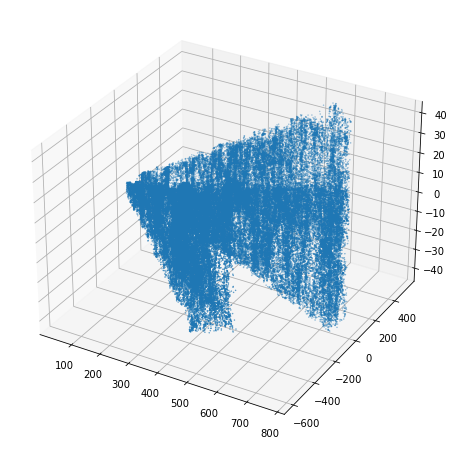

In [63]:
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.scatter3D(rot_xyz[:,0], rot_xyz[:,1], rot_xyz[:,2], s=0.2)

In [74]:
idx = np.arange(0,len(rot_xyz))
df_rot = pd.DataFrame(np.c_[idx,rot_xyz])

In [75]:
np.savetxt('./data/GAMA_rotpos.txt', df_rot.values, fmt='%d', header='id px py pz')

## Filtering for DDP1

In [82]:
np.unique(data['FIELD'])

G12
G15
G9


In [87]:
G15 = np.array(data['FIELD'], dtype=str)
ii_G15 = G15 == 'G15'
ii_G15

array([False, False,  True, ..., False,  True, False])

In [88]:
DDP = np.array(data['DDP'])
ii_DDP1 = DDP[:,0] == 1 
df_pos_DDP1 = df_pos[ii_DDP1 & ii_G15]
rot_xyz_ddp1 = rot_xyz[ii_DDP1 & ii_G15]

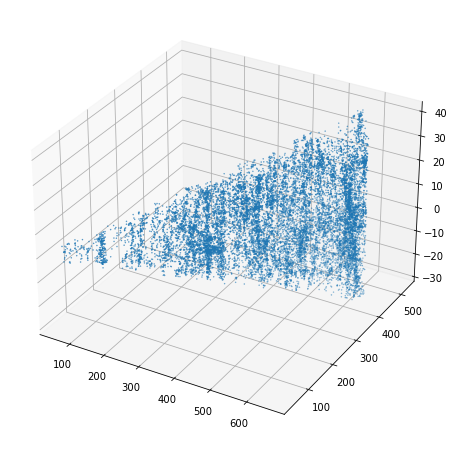

In [89]:
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.scatter3D(rot_xyz_ddp1[:,0], rot_xyz_ddp1[:,1], rot_xyz_ddp1[:,2], s=0.2)

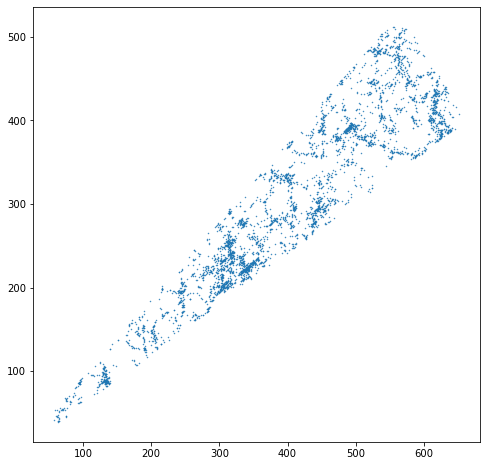

In [92]:
fig = pl.figure(figsize=(8,8), rasterized=True)
is_slice = (rot_xyz_ddp1[:,2]>-5) & (rot_xyz_ddp1[:,2]<5)
pl.scatter(rot_xyz_ddp1[:,0][is_slice], rot_xyz_ddp1[:,1][is_slice], s=0.2)

In [93]:
idx = np.arange(0,len(rot_xyz_ddp1))
df_rot_ddp1 = pd.DataFrame(np.c_[idx,rot_xyz_ddp1])

In [94]:
np.savetxt('./data/GAMA_rotpos_ddp1_gr15.txt', df_rot_ddp1.values , fmt='%d', header='id px py pz')

In [103]:
f = open('./data/GAMA_rotpos_ddp1.txt.NDnet_s3.5.up.NDskl.S001.a.NDskl')
doc = f.readlines()

In [104]:
doc = np.array(doc)
ii = np.where(doc=='[FILAMENTS]\n')[0][0]
N_fila = int(doc[ii+1])
N_fila

1251

/tmp/ipykernel_155980/2056098844.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "renderized" which is no longer supported as of 3.3 and will become an error in 3.6
  pl.savefig('./figs/GAMA_rotpos_ddp1.pdf', bbox_inches='tight', renderized=True)


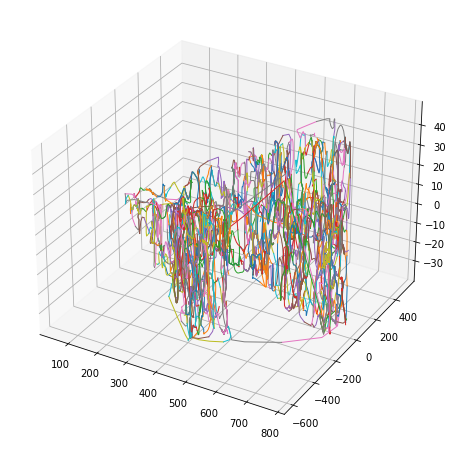

In [105]:
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')

for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    # print(jj,jj_new)
    # print(doc[jj].replace('\n',''),doc[jj_new])
    ax.plot3D(FILA[i][:,0], FILA[i][:,1], FILA[i][:,2], lw=1) 
    jj = jj_new

pl.savefig('./figs/GAMA_rotpos_ddp1.pdf', bbox_inches='tight', renderized=True)
pl.show()

In [106]:
f = open('./data/GAMA_rotpos_ddp1_gr15.txt.NDnet_s3.5.up.NDskl.S001.a.NDskl')
doc = f.readlines()

In [107]:
doc = np.array(doc)
ii = np.where(doc=='[FILAMENTS]\n')[0][0]
N_fila = int(doc[ii+1])
N_fila

363

/tmp/ipykernel_155980/2411989260.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "renderized" which is no longer supported as of 3.3 and will become an error in 3.6
  pl.savefig('./figs/GAMA_rotpos_ddp1_gr15_3D.pdf', bbox_inches='tight', renderized=True)


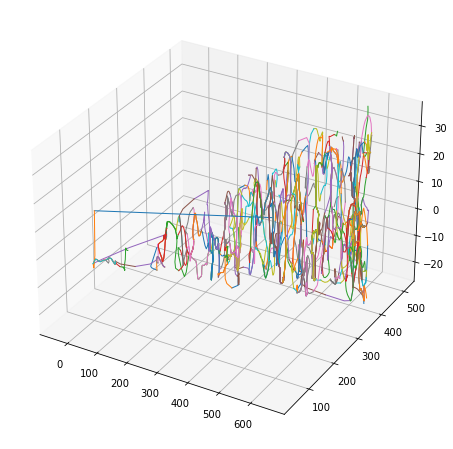

In [108]:
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')

for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    # print(jj,jj_new)
    # print(doc[jj].replace('\n',''),doc[jj_new])
    ax.plot3D(FILA[i][:,0], FILA[i][:,1], FILA[i][:,2], lw=1) 
    jj = jj_new

pl.savefig('./figs/GAMA_rotpos_ddp1_gr15_3D.pdf', bbox_inches='tight', renderized=True)
pl.show()

/tmp/ipykernel_155980/1095985341.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "renderized" which is no longer supported as of 3.3 and will become an error in 3.6
  pl.savefig('./figs/GAMA_rotpos_ddp1_gr15_2D.pdf', bbox_inches='tight', renderized=True)


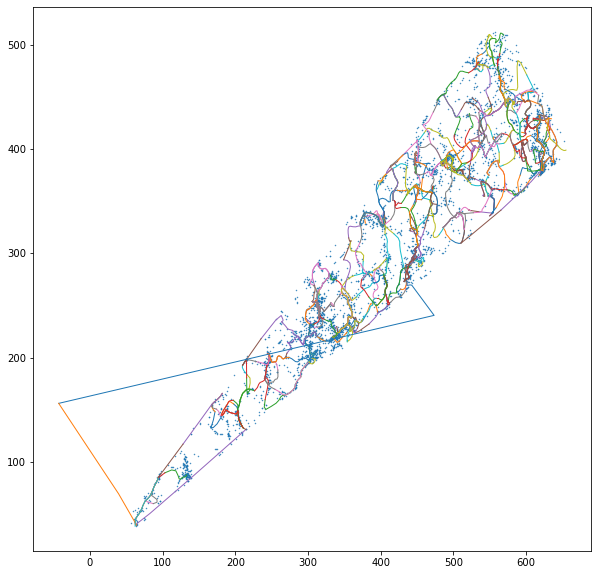

In [127]:
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(10,10), rasterized=True)
for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    # is_slice = (FILA[i][:,2]<5) & (FILA[i][:,2]>-5)
    # print(jj,jj_new)
    # print(doc[jj].replace('\n',''),doc[jj_new])
    # pl.plot(FILA[i][:,0][is_slice], FILA[i][:,1][is_slice], lw=1) 
    pl.plot(FILA[i][:,0], FILA[i][:,1], lw=1) 
    jj = jj_new

is_slice = (rot_xyz_ddp1[:,2]>-5) & (rot_xyz_ddp1[:,2]<5)
pl.scatter(rot_xyz_ddp1[:,0][is_slice], rot_xyz_ddp1[:,1][is_slice], s=0.2)
pl.savefig('./figs/GAMA_rotpos_ddp1_gr15_2D.pdf', bbox_inches='tight', renderized=True)
pl.show()

# f = open('./data/GAMA_rotpos_ddp1_gr15.txt.NDnet_s3.5.up.NDskl.S001.a.segs')
doc2 = f.readlines()
f.close()

In [114]:
N_segs = int(doc2[2].replace('\n','').split(' ')[1])
N_segs

8489

In [115]:
SEGMENTS_SRT = np.array(doc2)[3:]

In [116]:
SEGMENTS = np.array([np.array(f.split(' '), dtype=float) for f in SEGMENTS_SRT])

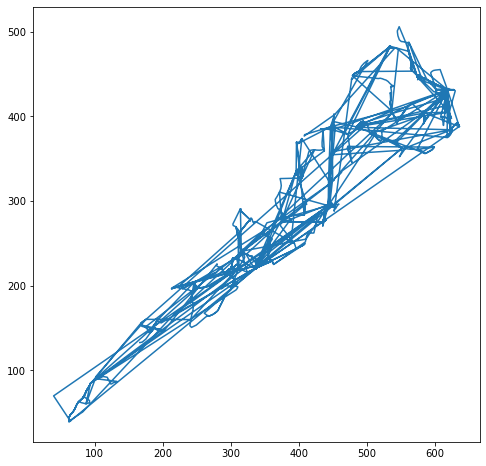

In [121]:
fig = pl.figure(figsize=(8,8), rasterized=True)

is_slice = (SEGMENTS[:,2]>-5) & (SEGMENTS[:,2]<5)
plot = pl.plot(SEGMENTS[:,0][is_slice], SEGMENTS[:,1][is_slice])
pl.show()